Group Details:

*   Janusz Feigel
*   Bhavana Malla
*   Brinda Rao

In [5]:
import os
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

In [6]:
print("TensorFlow version:", tf.__version__)
os.getcwd()

TensorFlow version: 2.7.0


'/content'

In [8]:
os.chdir('/content/drive/My Drive/Colab Notebooks')
os.getcwd()

'/content/drive/My Drive/Colab Notebooks'

In [9]:
#Load the top n frequent words and remove the rest infrequent words
top_words = 20000
(train_sequences, train_labels), (test_sequences, test_labels) = tf.keras.datasets.imdb.load_data(num_words=top_words)

In [10]:
# look at some sequences. words have been replaced with arbitrary index mappings
# 1 is a special "beginning of sequence" marker
# infrequent words have been replaced by the index 2
# actual words start with index 4, 3 is never used (???)
train_sequences[:3]

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 82

In [11]:
# labels are simply binary: sentiment can be positive(1) or negative(0)
train_labels[:3]

array([1, 0, 0])

In [12]:
# to restore words, load the word-to-index mapping
word_to_index = tf.keras.datasets.imdb.get_word_index()

1654784/1641221 [==============================] - 0s 0us/step


In [13]:
# invert to get index-to-word mapping
index_to_word = dict((index, word) for (word, index) in word_to_index.items())

In [28]:
# we can convert a sequence to text by
# - replacing each index by the respective word
# - joining words together via spaces
# note that we remove the beginning of sequence character and we have to subtract 3 from all indices
# this is because, as mentioned above, the smallest indices are reserved for special characters
# but for some reason this is not reflected in the mapping...
" ".join([index_to_word[index-1] for index in train_sequences[0][1:]])


"was not for it's self joke professional disappointment see already pretending their staged a every so found of his movies it's third plot good episodes the in who guess wasn't of doesn't a again plot find the poor let her a again vegas trouble with fight like that oh a big good for to watching essentially but was not a fat centers turn a not well how this for it's self like bad as that natural a not with starts with this for david movie gadget's of only moments this br special br films of a sell infected for guess their childish an a man this for like musical of his ever more so while there his feelings an to not this role be get when of was others for people arthur's br a character love newer as found a the is turner of upon so well it's self fine have early seeing if is a renewed social that watch him a sex as plays could by suffering time have through to long skeptical movie a music not on scene fine have guess of i'm all sympathize movie more so be whole its his watch a music see 

In [ ]:
# we cannot create a dataset :( this is because sequences are different length
# but tensors have to be "rectangular"
train_data = tf.data.Dataset.from_tensor_slices(train_sequences, train_labels)

In [31]:
# solution is padding all sequences to the maximum length.
# first find the maximum length
sequence_lengths = [len(sequence) for sequence in train_sequences]
max_len = max(sequence_lengths)
max_len

2494

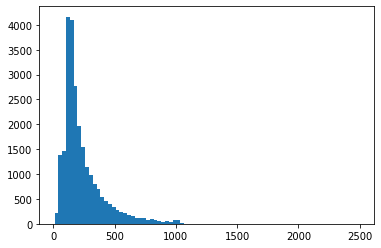

In [32]:
# overview over sequence lengths in the data
# could also look at mean, median, standard deviation...
plt.hist(sequence_lengths, bins=80)
plt.show()

In [33]:
# luckily there is a convenient function for padding
train_sequences_padded = tf.keras.preprocessing.sequence.pad_sequences(train_sequences, maxlen=max_len)

In [34]:
# now we can create a dataset!
train_data = tf.data.Dataset.from_tensor_slices((train_sequences_padded, train_labels))

In [35]:
# all sequences are... very long
train_sequences_padded.shape

(25000, 2494)

In [36]:
# it would be better to do something like this
# all sequences above maxlen will be truncated to that length
# note: pad_sequences has "pre" and "post" options for both padding and truncation. one may be better than the other!
train_sequences_padded = tf.keras.preprocessing.sequence.pad_sequences(train_sequences, maxlen=200)
train_data = tf.data.Dataset.from_tensor_slices((train_sequences_padded, train_labels))

train_sequences_padded.shape

(25000, 200)

In [38]:
# for fun, you can look at the word-index mappings.
# in this case, the mapping was done according to word frequency/
# you can pass reverse=True to sorted() to look at the least common words.
sorted(index_to_word.items(),reverse=True)[:100]

[(88584, "'l'"),
 (88583, "voorhees'"),
 (88582, 'artbox'),
 (88581, 'copywrite'),
 (88580, "pipe's"),
 (88579, 'wheelers'),
 (88578, 'sics'),
 (88577, 'transacting'),
 (88576, 'chicatillo'),
 (88575, 'ev'),
 (88574, 'urrrghhh'),
 (88573, 'airsoft'),
 (88572, "nemesis'"),
 (88571, "guard's"),
 (88570, "'solve'"),
 (88569, 'odilon'),
 (88568, "baywatch'"),
 (88567, 'heralding'),
 (88566, 'lubricated'),
 (88565, 'percival'),
 (88564, 'reble'),
 (88563, 'fountainhead'),
 (88562, "olan's"),
 (88561, 'amitabhs'),
 (88560, 'contradictors'),
 (88559, 'wight'),
 (88558, "bearings'"),
 (88557, 'lederer'),
 (88556, "'half"),
 (88555, 'expeditious'),
 (88554, 'maize'),
 (88553, 'slahsers'),
 (88552, "mariner's"),
 (88551, "'hall"),
 (88550, 'unoticeable'),
 (88549, 'fitzgibbon'),
 (88548, 'intercontenital'),
 (88547, 'empahh'),
 (88546, 'daud'),
 (88545, 'swinginest'),
 (88544, 'thoroughfare'),
 (88543, 'pensaba'),
 (88542, 'miniskirts'),
 (88541, 'uneffective'),
 (88540, 'catepillar'),
 (88539, 

In [ ]:
# here is a high-level sketch for training RNNs


# training loop -- same thing as before!!
# our data is now slightly different (each batch of sequences has a time axis, which is kinda new)
# but all the related changes are hidden away at lower levels
def train_loop():
    for sequence_batch, label_batch in train_data:
        train_step(sequence_batch, label_batch)


# a single training step -- again, seems familiar?
def train_step(sequences, labels):
    with tf.GradientTape() as tape:
        logits = rnn_loop(sequences)
        loss = loss_fn(labels, logits)

    gradient = ...
    apply_gradients(...)


# here's where things start to change
# we loop over the input time axis, and at each time step compute the new
# hidden state based on the previous one as well as the current input
# the state computation is hidden away in the rnn_step function and could be
# arbitrarily complex.
# in the general RNN, an output is computed at each time step, and the whole
# sequence is returned. but in this case, since we only have one label for the
# entire sequence, we only use the final state to compute one output and return it.
# before the loop, the state need to be initialized somehow.
def rnn_loop(sequences):
    old_state = ...

    for step in range(max_len):
        x_t = sequences[:, step]
        x_t = tf.one_hot(x_t, depth=num_words)
        new_state = rnn_step(old_state, x_t)

        old_state = new_state

    o_t = output_layer(new_state)

    return o_t


# see formulas in the book ;)
def rnn_step(state, x_t):
    ...